# Explore data
- 19/11
- Just observe the shape and dynamics of data grabed on <https://data.un.org/Explorer.aspx>

# World 3 data

In [1]:
# imports
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

# Put git on branch main !
world3_path = "/home/achille/Bureau/couillet/world3/pyworld3/pyworld3"
if world3_path not in sys.path:
    sys.path.append(world3_path)
from pyworld3 import World3
from pyworld3.utils import plot_world_with_scales, variable_definitions

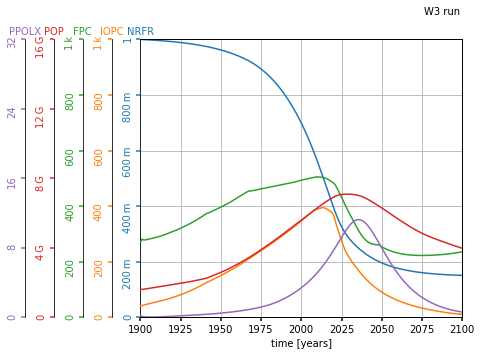

In [2]:
# Run
w = World3(dt=1)
w.init_world3_constants()
w.init_world3_variables()
w.set_world3_table_functions()
w.set_world3_delay_functions()
w.run_world3()
plot_world_with_scales(w)

In [14]:
all_variables = dict()
for v in dir(w):
    thing = w.__getattribute__(v)
    if type(thing) == np.ndarray:
        if v not in {'time'}:
            all_variables[v] = thing/np.linalg.norm(thing)

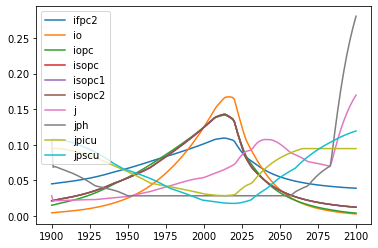

In [24]:
B = 60
N = B + 10
plt.plot(w.time, np.array(list(all_variables.values())[B:N]).T)
plt.legend(list(all_variables.keys())[B:N]);

# Real data

In [91]:
import pandas as pd
import random
data_base_path = '/home/achille/Bureau/couillet/ML/data/'

<AxesSubplot:xlabel='Year'>

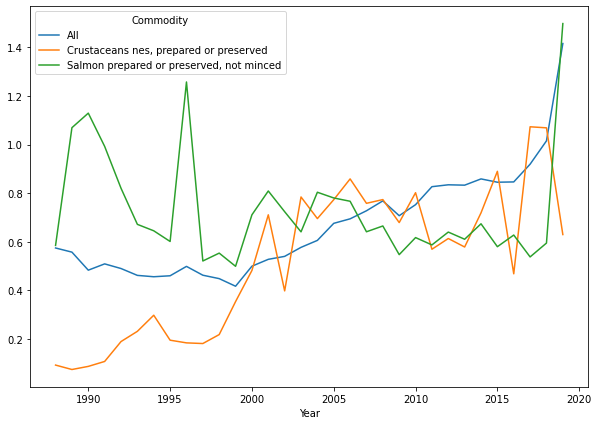

In [117]:
com_file = "UNdata_Export_20211105_113420782.csv"
df = pd.read_csv(data_base_path + com_file)
N = 2
random_com = set(random.sample(list(df['Commodity'].unique()), N))
sdf = df[df.apply(lambda x: x['Commodity'] in random_com, axis=1)].groupby(['Year','Commodity']).mean()
pdf = sdf.pivot_table(index='Year', columns='Commodity', values='Weight (kg)')
pdf.insert(0, 'All', df.groupby('Year').mean()['Quantity'])
ndf = pdf.apply(lambda x: x/(max(x) - min(x)), axis=0)
ndf.plot(figsize = (10, 7))

<AxesSubplot:xlabel='Year'>

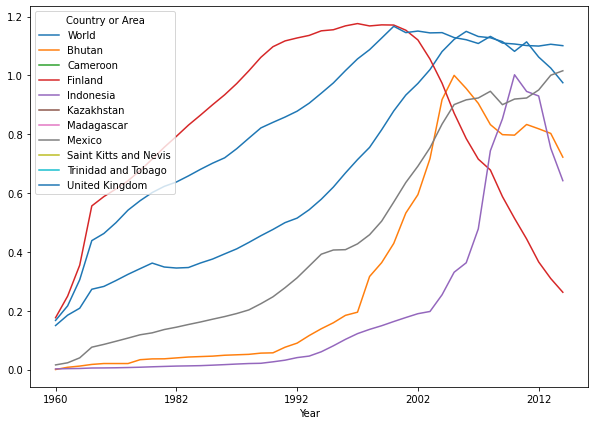

In [111]:
data_name = 'UNdata_Export_20211105_113539059.csv'
dfp = pd.read_csv(data_base_path + data_name)[:8325]
N = 10
random_countries = set(random.sample(list(dfp['Country or Area'].unique()), N))
sdfp = dfp[dfp.apply(lambda x: x['Country or Area'] in random_countries, axis=1)]
pdfp = sdfp.pivot_table(index='Year', columns='Country or Area', values='Value')
wdfp = pdfp.insert(0, 'World', dfp.groupby('Year').mean()['Value'])
ndfp = pdfp.apply(lambda x: x/(max(x) - min(x)), axis=0)
ndfp.plot(figsize = (10, 7))